In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
#@title Run this cell to get the datasets

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

4423680/4422102 [==============================] - 0s 0us/step


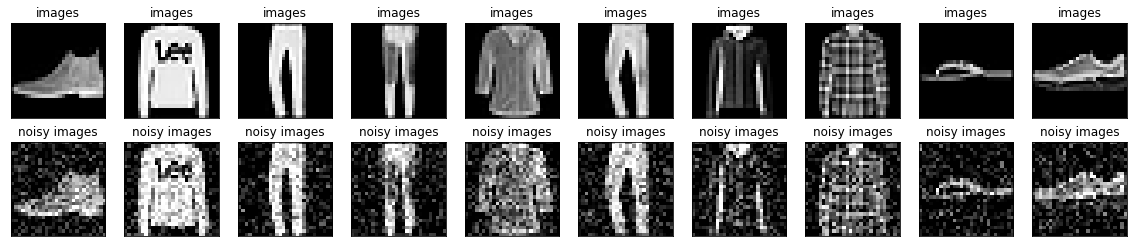

In [3]:
#@title Run this cell to view the datasets

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original images
  ax = plt.subplot(2, n, i + 1)
  plt.title("images")
  plt.imshow(tf.squeeze(x_test[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display noisy images
  ax = plt.subplot(2, n, i + 1 + n)
  plt.title("noisy images")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
print(x_train_noisy.shape)
print(x_train.shape)
print(x_test_noisy.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


# First Model: `autoencoder_one`

## Step 1: Create `encoder_one` model

In [22]:
encoder_one = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3), activation="relu", padding="same", strides=2),
  tf.keras.layers.Conv2D(8,(3,3), activation="relu", padding="same", strides=2)
])

## Step 2: Create `decoder_one` model

In [37]:
decoder_one = tf.keras.models.Sequential([
  tf.keras.layers.Conv2DTranspose(8,(3,3), activation="relu", padding="same", strides=2),
  tf.keras.layers.Conv2DTranspose(16,(3,3), activation="relu", padding="same", strides=2),
  tf.keras.layers.Conv2D(1,(3,3), activation="sigmoid", padding="same")                    
])

## Step 3: Create `autoencoder_one` by putting `encoder_one` and `decoder_one` into one model

In [38]:
autoencoder_one = tf.keras.Sequential([
  encoder_one,
  decoder_one                                     
])

## Step 4: Specify `optimizer` and `loss` function

In [54]:
autoencoder_one.compile(optimizer="adam", loss=tf.keras.losses.mean_squared_error)

## Step 5: Train the model using `x_train_noisy` as input and `x_train` as output with 10 `epochs`

In [55]:
train_model_one = autoencoder_one.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0072
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0070
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0069
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0068
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0068
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0068
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0067
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0067
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0067
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0066


## Step 6: Evaluate the model using `x_test_noisy` as input and `x_test` as output

In [56]:
autoencoder_one.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0067


0.006681937258690596

## Step 7: Show the summary of `encoder_one` and `decoder_one` models

In [57]:
encoder_one.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [58]:
decoder_one.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


## Step 8: Use the `autoencoder_one` model to denoise `x_test_noisy` dataset and keep the result in a variable named `denoised`

In [59]:
denoised = autoencoder_one(x_test_noisy)

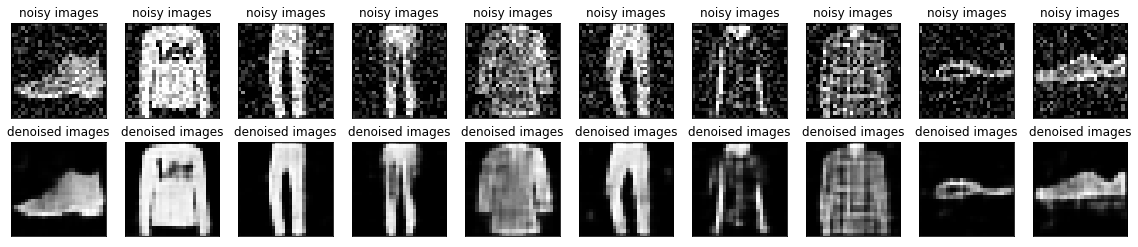

In [60]:
#@title Step 9: Run this cell to view how your model denoised the noisy images

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("noisy images")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("denoised images")
    plt.imshow(tf.squeeze(denoised[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

# Second Model: `autoencoder_two`

## Step 1: Create `encoder_two` model

In [46]:
encoder_two = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu')           
])

## Step 2: Create `decoder_two` model

In [52]:
decoder_two = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784, activation='sigmoid'),           
  tf.keras.layers.Reshape((28,28))                                
])

## Step 3: Create `autoencoder_two` model

In [53]:
autoencoder_two = tf.keras.models.Sequential([
  encoder_two,
  decoder_two                                           
])

## Step 4: Specify `optimizer` and `loss` function

In [62]:
autoencoder_two.compile(optimizer="adam", loss=tf.keras.losses.mean_squared_error)

## Step 5: Train the model using `x_train` as input and `x_train` as output with 10 `epochs`

In [63]:
train_model_two = autoencoder_two.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0390
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0122
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0103
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0096
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0088
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0087


## Step 6: Evaluate the model using `x_test` as input and `x_test` as output

In [64]:
autoencoder_two.evaluate(x_test, x_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0088


0.008786926046013832

## Step 7: Show the summary of `encoder_two` and `decoder_two` models

In [65]:
encoder_two.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [66]:
decoder_two.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


## Step 8: Use the model to encode and decode images

You can use the code below to encode images

In [72]:
encoded_imgs = encoder_two(x_test).numpy()

You can the code below to decode the encoded images

In [73]:
decoded_imgs = decoder_two(encoded_imgs).numpy()